# Step 4: Model Interpretation & Explainability (SHAP)
In this notebook, we use SHAP to interpret the predictions of the best-performing model from our breast cancer classification project. SHAP provides global and local explanations that help clinicians understand model behavior.

In [2]:
!pip install shap --quiet

In [3]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

sns.set(style='whitegrid')
%matplotlib inline

## Load and Preprocess the Data

In [5]:
df = pd.read_csv("Data for Task 1.csv")
df.drop(columns=["id", "Unnamed: 32"], inplace=True, errors="ignore")
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

## Train the Random Forest Model

In [7]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_df, y_train)

RandomForestClassifier(random_state=42)

## Create SHAP Explainer

In [9]:
explainer = shap.Explainer(model, X_train_df, feature_names=X.columns)
shap_values = explainer(X_test_df)
class1_shap_values = shap_values[..., 1]

## Global Feature Importance (Bar Plot)

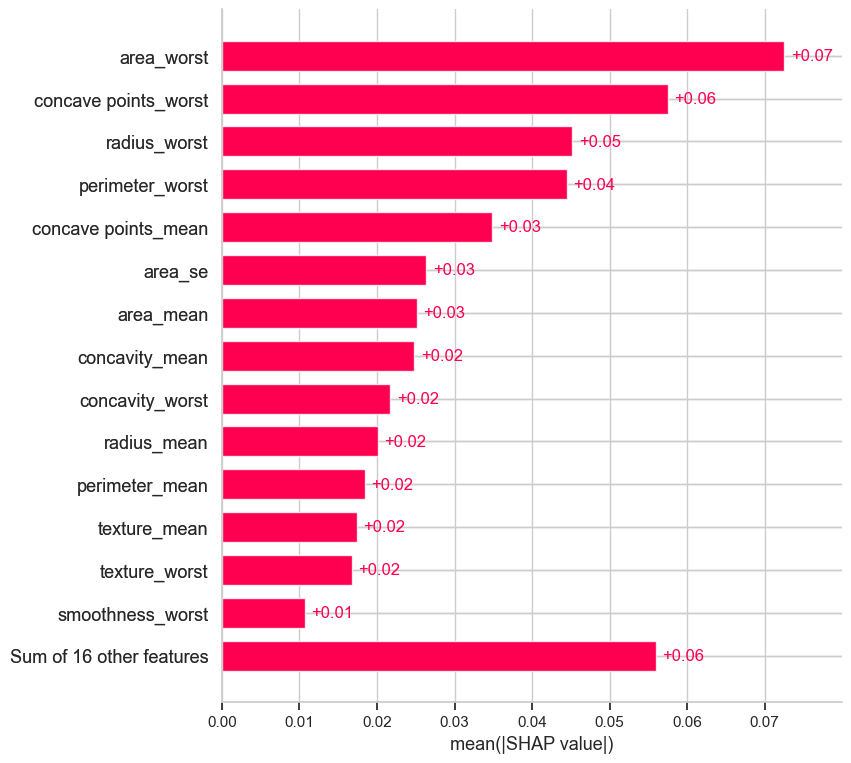

In [11]:
shap.plots.bar(class1_shap_values, max_display=15)

## SHAP Summary Plot (Beeswarm)

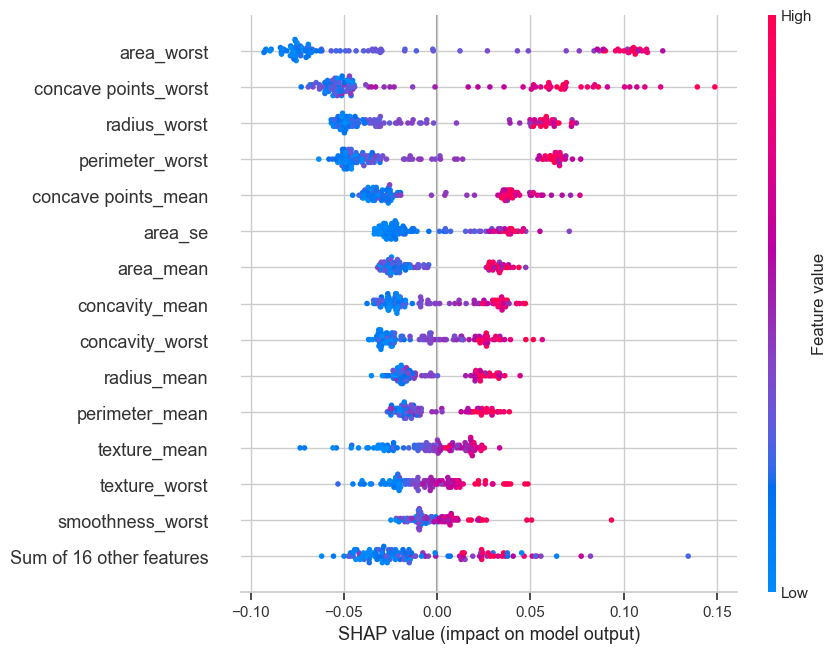

In [13]:
shap.plots.beeswarm(class1_shap_values, max_display=15)

## Local Explanation (Force Plot for One Case)

In [25]:
shap.initjs()
index = 0  # try different values like 3, 10, etc.
shap.force_plot(class1_shap_values[index], show=True)